In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

5


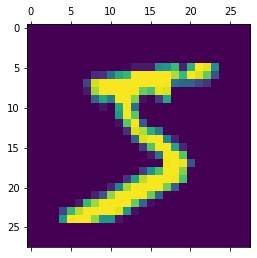

In [5]:
plt.matshow(X_train[0])
print(y_train[0])

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
#scaling will help the model

In [8]:
X_train= X_train/255
X_test = X_test/255

In [9]:
#We'll need to flatten the 28x28 grid

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_test_flattened.shape,X_train_flattened.shape)

(10000, 784) (60000, 784)


In [11]:
# Creating a simple neural network 

In [12]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #output,inputneuron no.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',#because int value
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4707 - accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3040 - accuracy: 0.9144
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2727 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2667 - accuracy: 0.9252
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2622 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9283
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2555 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2531 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.250

In [13]:
y_preds= model.predict(X_test_flattened)
y_preds[100]

array([1.3305843e-03, 3.2545328e-02, 5.5025232e-01, 1.9660473e-02,
       3.9286613e-03, 8.2755089e-04, 9.6952760e-01, 2.2250414e-04,
       3.6332905e-03, 4.3325628e-05], dtype=float32)

6

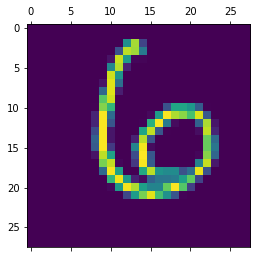

In [14]:
plt.matshow(X_test[100])
np.argmax(y_preds[100]) #prints index of max value

In [15]:
#convering y_pred values to int values using loop 
y_preds_labels= [np.argmax(i) for i in y_preds]
y_preds_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [16]:
y_preds_labels= [np.argmax(i) for i in y_preds]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 947,    0,    4,    2,    1,   10,   10,    4,    2,    0],
       [   0, 1116,    4,    0,    0,    1,    4,    2,    8,    0],
       [   2,    9,  934,   11,   10,    7,   12,   11,   34,    2],
       [   2,    0,   21,  890,    0,   53,    2,   12,   24,    6],
       [   1,    1,    5,    1,  916,    0,    9,    7,   11,   31],
       [   7,    3,    2,   15,    7,  810,   12,    7,   26,    3],
       [   6,    3,    6,    1,    7,   21,  910,    2,    2,    0],
       [   1,    6,   24,    2,    7,    1,    0,  962,    3,   22],
       [   5,   12,    6,   15,    9,   36,    9,   11,  865,    6],
       [   9,    7,    1,    7,   25,    9,    0,   29,    9,  913]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

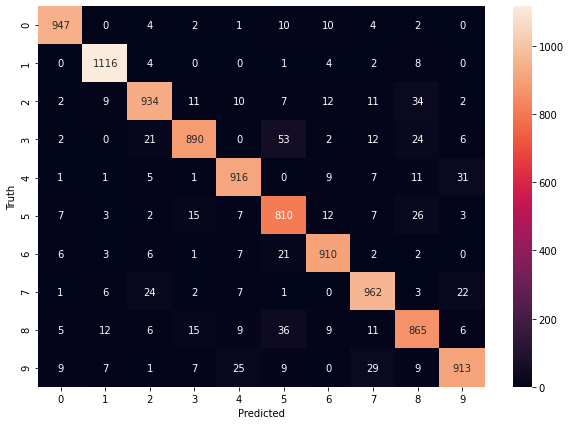

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
#Adding Hidden layers

In [19]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#Flatten function from keras 
    keras.layers.Dense(100,activation='relu'), # 100 in the hidden layer number
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',#because int value
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2754 - accuracy: 0.9213
Epoch 2/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1248 - accuracy: 0.9634


In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9687


[0.10082675516605377, 0.9686999917030334]

Text(69.0, 0.5, 'Truth')

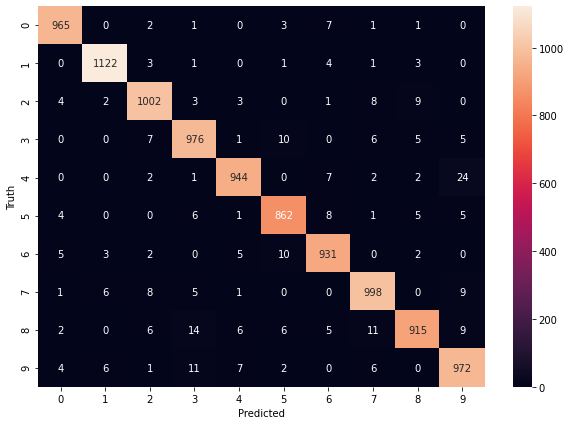

In [22]:
y_preds= model.predict(X_test)
y_preds_labels= [np.argmax(i) for i in y_preds]

cm_2=tf.math.confusion_matrix(labels=y_test,predictions=y_preds_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm_2,annot=True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')